# Notebook Structure

1. Import necessary dependencies
2. Create the dataset
3. Create clustered bar chart


# 1. Import necessary dependencies

In [128]:
# libraries & dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme(style="whitegrid")

# 2. Create the dataset

In [129]:
# Dataset for Global Vehicle Sales Growth
data = {
    'Year': [2018, 2019, 2020, 2021, 2022, 2023],
    'Internal Combustion Engine': [-2, -4, -15, 1, -4, 9],
    'Battery Electric Vehicles': [70, 18, 33, 113, 59, 28]
}

In [130]:
# Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(data)
df

,Year,Internal Combustion Engine,Battery Electric Vehicles
0,2018,-2,70
1,2019,-4,18
2,2020,-15,33
3,2021,1,113
4,2022,-4,59
5,2023,9,28


# 3. Create clustered bar chart

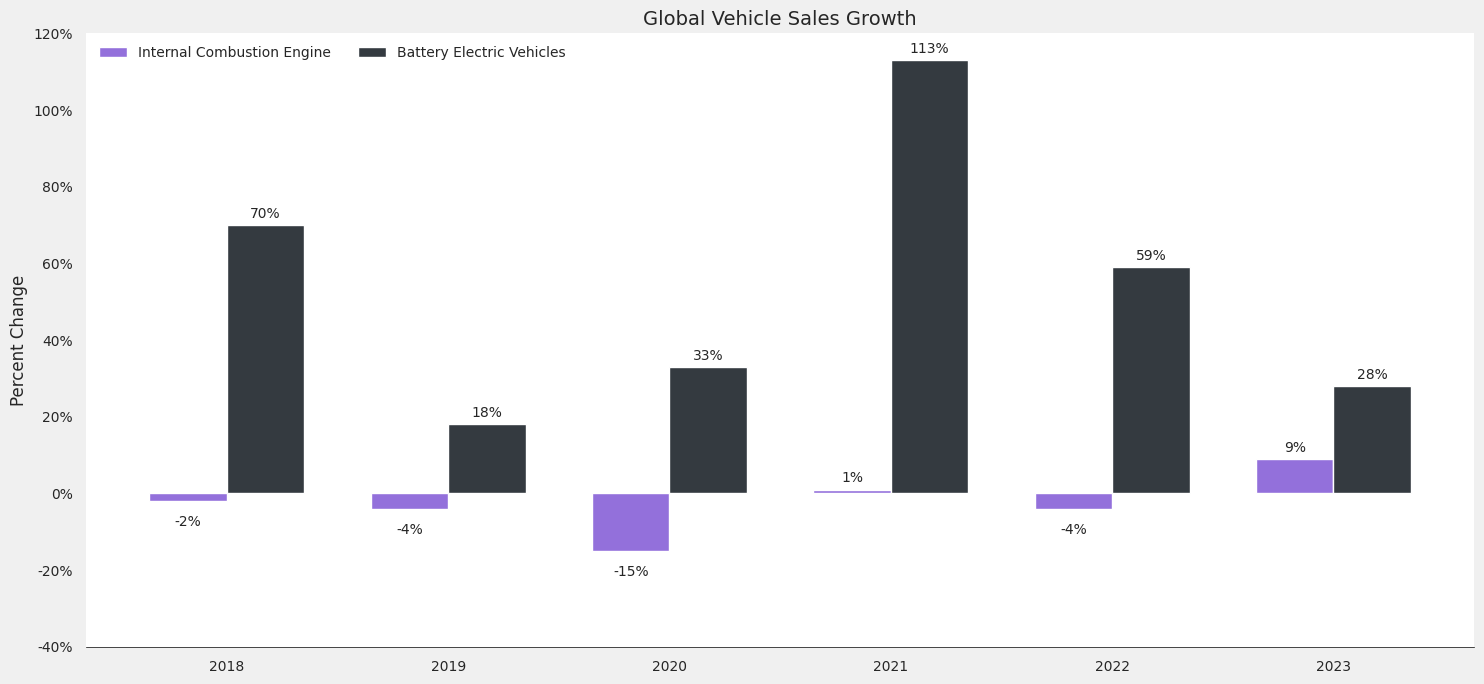

In [133]:
fig, ax = plt.subplots(figsize=(15, 7))
fig.patch.set_facecolor('#f0f0f0') # Match background color

bar_width = 0.35
x = np.arange(len(df['Year']))

# Create bars for Internal Combustion Engine
rects1 = ax.bar(x - bar_width/2, df['Internal Combustion Engine'], bar_width, label='Internal Combustion Engine', color='#9370DB')

# Create bars for Battery Electric Vehicles
rects2 = ax.bar(x + bar_width/2, df['Battery Electric Vehicles'], bar_width, label='Battery Electric Vehicles', color='#343A40')

# Function to add labels, positioning negative values below the bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        if height >= 0:
            ax.annotate(f'{height}%',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)
        else:
            ax.annotate(f'{height}%',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -10),  # 10 points vertical offset (downwards)
                        textcoords="offset points",
                        ha='center', va='top', fontsize=10)

add_labels(rects1)
add_labels(rects2)

# Set y-axis formatting
ax.set_ylabel('Percent Change', fontsize=12)
ax.set_yticks(np.arange(-40, 140, 20))
ax.set_yticklabels([f'{i}%' for i in range(-40, 140, 20)], fontsize=10)
ax.set_ylim(-40, 120)

# Set x-axis formatting
ax.set_xlabel('', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(df['Year'], fontsize=10)

# Title
ax.set_title('Global Vehicle Sales Growth', fontsize=14)

# Legend
ax.legend(loc='upper left', fontsize=10, frameon=False, ncol=2)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['bottom'].set_color('black')

ax.grid(visible=None)

plt.tight_layout()
plt.show()